In [34]:
from keras.datasets import cifar100
from keras.utils import layer_utils, np_utils
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import keras.backend as K
import numpy as np
import pickle

In [3]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

In [4]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [5]:
x_train_original

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

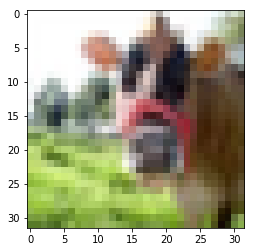

In [6]:
imgplot = plt.imshow(x_train_original[0])
plt.show()

<h1>Traducir las imagenes</h1>
<p>Las imagenes se presentan en una escala RGB que es con lo que se encuentra las matrices se las debe reducir a una escala de entre 1 y 0 para lo cual se debe dividir para 255 que es el maximo de valores dentro de la matriz y que en colores representaria el blanco</p>

In [7]:
x_train = x_train_original/255
x_test = x_test_original/255

<h1>Diseñando el terreno</h1>
<p> A continuacion con keras se intenta especificar donde se encuentra los canales y dado a que existe un array de imagenes, los canales pueden venir en el primero como en la ultima parte, por lo que definire en el final</p>

In [8]:
K.set_image_data_format('channels_last')

<p>Luego se explica la fase en la que se encontrara el entrenamiento</p>

In [9]:
K.set_learning_phase(1)

<h1>Creacion de la red neuronal</h1>
<p>La red neuronal constara de 2 capas ocultas las cuales:</p>
1. La primera capa (entrada) consta la funcion 'Flatten' la cual permite convertir una matriz de imagen a un vector plano para el ahorramiento de proceso<br>
2. La segunda capa constara de 1000 neuronas la cual se maneja la funcion de activacion 'RELU' el cual su resultado procede desde 0 hasta Z que es puede ser cualquier numero positivo sin tener un limite<br>
3. La tercera capa funciona bajo los mismos parametros de la segunda solo que con la leve diferencia que esta consta de 500 neuronas para su procesamiento<br>
4. La cuarta entrada funciona bajo 100 neuronas las cuales tienen como función de activacion 'SOFTMAX' el cual se encarga de dar un resultado de dar un resultado el cual se encuentra entre 0 a 1 respectivamente para despues ser manejado como probabilidad<br>

In [10]:
def create_simple_nn():
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3), name='Input_layer'))
    model.add(Dense(1000, activation='relu', name='Hidden_layer_1'))
    model.add(Dense(500, activation='relu', name='Hidden_layer_2'))
    model.add(Dense(100, activation='softmax', name='Output_layer'))
    return model

<h1>Compilacion del modelo</h1>
<p>Para la compilacion se necesitaran de 3 parametros los cuales son:</p>
1. La funcion de optimizacion la cual se basa en descenso por gradiente estocastico <br>
2. La funcion de perdida la cual va ser la 'entropia cruzada' la cual se encarga de elegir a traves de la funcion 'softmax' cual contiene la mayor probabilidad de estas<br>
3. Y en metricas se tendra lo que es la taza de acciertos y la media de errores cuadrados para ser analizada<br>

In [11]:
snn_model = create_simple_nn()
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc','mse'])

Instructions for updating:
Colocations handled automatically by placer.


<h1>Obtencion de resultados</h1>
<p>Para mostrar como se encuentra compuesta la red neuronal se usa bajo la norma 'SUMMARY()'</p>

In [12]:
snn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 3072)              0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 1000)              3073000   
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 500)               500500    
_________________________________________________________________
Output_layer (Dense)         (None, 100)               50100     
Total params: 3,623,600
Trainable params: 3,623,600
Non-trainable params: 0
_________________________________________________________________


<h1>Entrenamiento de la red</h1>
<p>En esta etapa se realizan dos partes a la vez ya que la funcion 'FIT' permite el ingreso tanto de los datos para entrenamiento como para validacion y para su entrenamiento comenzara con 3 millones de parametros.</p><br>
<p>El parametro 'shuffle' permite que los datos sean mezclado aleatoriamente en cada epoca</p>

In [13]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 287s 6ms/step - loss: 4.1831 - acc: 0.0716 - mean_squared_error: 0.0097 - val_loss: 3.9451 - val_acc: 0.1015 - val_mean_squared_error: 0.0096
Epoch 2/10
50000/50000 [==============================] - 285s 6ms/step - loss: 3.8016 - acc: 0.1318 - mean_squared_error: 0.0095 - val_loss: 3.7636 - val_acc: 0.1322 - val_mean_squared_error: 0.00955s - loss
Epoch 3/10
50000/50000 [==============================] - 279s 6ms/step - loss: 3.6399 - acc: 0.1575 - mean_squared_error: 0.0093 - val_loss: 3.6549 - val_acc: 0.1471 - val_mean_squared_error: 0.0093
Epoch 4/10
50000/50000 [==============================] - 276s 6ms/step - loss: 3.5381 - acc: 0.1768 - mean_squared_error: 0.0092 - val_loss: 3.6147 - val_acc: 0.1620 - val_mean_squared_error: 0.0093
Epoch 5/10
50000/50000 [==============================] - 278s 6ms/step - loss: 3.4546 - acc:

<h1>Validación</h1>
<p>Con la red entrenada por los ejemplos dados es posible enfrentar frente a otro dataset que tenga los mismos atributos pero una de las tecnicas es que antes de comenzar a probar con nuevos modelos lo fundamental es que la data se divida en dos campos por lo cual ahora se usara el 10% de los datos para su validacion que es un total de 10000, para luego ser probada con un dataset nuevo con los mismos atributos</p>

In [14]:
evaluation = snn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)

10000/10000 [==============================] - 19s 2ms/step


<h1>Mostracion de resultados</h1>
<p>A continuacion se muestra las diferentes graficas de como el modelo ha ido "aprendiendo" en cuestion a como pasa por las iteraciones y epocas. La perdida debe ser la mas baja para que el modelo pueda predecir un resultado correcto</p>

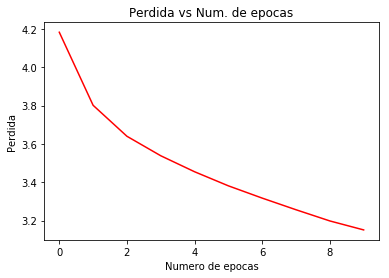

In [15]:
plt.figure(0)
plt.plot(snn.history['loss'],'r')
plt.xlabel('Numero de epocas')
plt.ylabel('Perdida')
plt.title('Perdida vs Num. de epocas')
plt.show()

<h1>Obteniendo resultados</h1>
<p>A continuacion se demostrara a traves de una sola imagen si es capaz de reconocer a que tipo de etiqueta pertenece, en este caso se utilizara la funcion 'predict' que se basa en la toma de una sola imagene para pasarla por la red neuronal y luego como arroja un total de 100 resultados distintos la funcion 'argmax' de numpy permite devolver el numero mayor que existe dentro de vectores que se encuentran alojados en matrices</p>

In [16]:
snn_pred = snn_model.predict(x_test, batch_size=32, verbose=1)

10000/10000 [==============================] - 20s 2ms/step


In [19]:
snn_predicted = np.argmax(snn_pred, axis=1)

<h1>Resultados</h1>
<p>Se mostraran los resultados usando los valores de 'y_test' para corroborar que los datos se encuentran bien en cuestion de resultados</p>

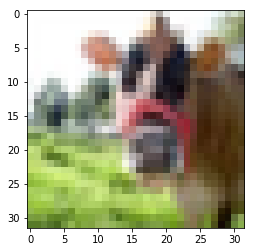

Clase de la imagen 0: 49
Prediccion:         49


In [60]:
imgplot = plt.imshow(x_train_original[0])
plt.show()
print('Clase de la imagen {}: '.format(0) + str(np.argmax(y_test[0])))  
print('Prediccion:         ' + str(snn_predicted[0])) 

<h1>Archivar</h1>
<p>A continuacion se guardaran los datos recopilados en un historial para posibles observaciones</p>

In [46]:
with open('simplenn_history.txt', 'wb') as file_pi:  
  pickle.dump(snn.history, file_pi)

In [57]:
f = open('Resultados.txt','w')
for k in snn_predicted:
    f.write('Clase de la imagen {}: '.format(k) + str(np.argmax(y_test[k]))+'\n'+'Prediccion:         ' + str(snn_predicted[k])+'\n')
f.close()